평가 -MNIST 손글씨 분류기 사례

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

데이터 탐색

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
digits.data[0], digits.target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

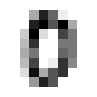

In [ ]:
plt.figure(figsize =(1,1))
plt.imshow(digits.images[0], cmap = plt.cm.binary, interpolation ='nearest')
plt.axis('off');

In [ ]:
digits.data.min(), digits.data.max()

(0.0, 16.0)

In [ ]:
X = digits.data /digits.data.max()
y = (digits.target == 7).astype(int)

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
np.unique(y,return_counts =True)

(array([0, 1]), array([1618,  179]))

Support Vector Machine으로 분류

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state=2023)
svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
pred_sv = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_sv)

0.9977777777777778

엉터리 분류기 : 무조건 0을 반환

In [ ]:
from sklearn.base import BaseEstimator
class MyClassifier(BaseEstimator):
    def fit(self, X,y):
        pass
    def predict(self, X):
        return np.zeros(X.shape[0], int)

In [ ]:
myc = MyClassifier()
myc.fit(X_train, y_train)
pred_my = myc.predict(X_test)
accuracy_score(y_test, pred_my)

0.9

평가

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print(confusion_matrix(y_test, pred_sv))
print(confusion_matrix(y_test, pred_my))

[[405   0]
 [  1  44]]
[[405   0]
 [ 45   0]]


In [ ]:
precision_score(y_test, pred_sv), precision_score(y_test, pred_my)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1.0, 0.0)

In [ ]:
recall_score(y_test, pred_sv), recall_score(y_test, pred_my)

(0.9777777777777777, 0.0)

In [ ]:
#  결정 경계와 이들 사이의 거리-> dual_coef_에 저장.
svc.dual_coef_

array([[-1.        , -0.04193921, -0.64727404, -1.        , -0.12044371,
        -1.        , -0.81167383, -1.        , -1.        , -0.14430709,
        -0.8876521 , -1.        , -1.        , -0.79201264, -1.        ,
        -0.21787789, -0.06350532, -1.        , -0.22169643, -0.09046867,
        -0.72150051, -1.        , -0.04620594, -1.        , -0.80279302,
        -1.        , -0.93821995, -0.1627865 , -0.23120001, -0.57918265,
        -0.50144021, -0.63407999, -0.51130096, -0.58741681, -1.        ,
        -1.        , -0.20490136, -0.2163913 , -1.        , -0.38125193,
        -0.11322289, -0.27585133, -0.67576325, -1.        , -0.82763834,
        -0.63742811, -0.53656303, -0.01856021, -1.        , -1.        ,
        -0.53963627, -0.69115793, -1.        , -1.        , -0.95753694,
        -0.36478224, -0.01407581,  0.61395416,  1.        ,  1.        ,
         0.18533127,  1.        ,  0.52755155,  1.        ,  1.        ,
         0.96236092,  1.        ,  0.28970075,  0.3

In [ ]:
#  모델 학습
model = SVC(gamma =0.01).fit(X_train, y_train)
#  평가
print('훈련 세트 정확도: {:,.2f}'.format(model.score(X_train,y_train)))
print('테스트세트 정확도: {:,.2f}'.format(model.score(X_test, y_test)))

훈련 세트 정확도: 0.99
테스트세트 정확도: 0.99


In [ ]:
#  각 특성의 최소값과 최대값을 로그 스케일로 변환(입력 특성들의 범위가 비슷해야 하므로)
from sklearn.preprocessing import MinMaxScaler
# 훈련데이터에 대해 스케일링 적용을 위한 조사
scaler = MinMaxScaler()
scaler.fit(X_train)
#  훈련데이터에 대해 스케일링 적용
X_train_scaled = scaler.transform(X_train)
#  테스트 데이터에 대해 스케일링 적용
X_test_scaled = scaler.transform(X_test)

MinMAxScaler를 통해 각 특성들에 대한 스케일링을 진행

In [ ]:
# gamma 파라미저 조정
model = SVC(gamma =0.01).fit(X_train, y_train)

# 평가
print('훈련세트 정확도: {:.3f}'.format(model.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(model.score(X_test, y_test)))

훈련세트 정확도: 0.990
테스트 세트 정확도: 0.987
